In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
#Imported the movie datset in csv format
df = pd.read_csv("movie_dataset.csv")
df

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
5,5,258000000,Fantasy Action Adventure,http://www.sonypictures.com/movies/spider-man3/,559,dual identity amnesia sandstorm love of one's ...,en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,...,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576,Tobey Maguire Kirsten Dunst James Franco Thoma...,"[{'name': 'Francine Maisler', 'gender': 1, 'de...",Sam Raimi
6,6,260000000,Animation Family,http://disney.go.com/disneypictures/tangled/,38757,hostage magic horse fairy tale musical,en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,...,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330,Zachary Levi Mandy Moore Donna Murphy Ron Perl...,"[{'name': 'John Lasseter', 'gender': 2, 'depar...",Byron Howard
7,7,280000000,Action Adventure Science Fiction,http://marvel.com/movies/movie/193/avengers_ag...,99861,marvel comic sequel superhero based on comic b...,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,...,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767,Robert Downey Jr. Chris Hemsworth Mark Ruffalo...,"[{'name': 'Danny Elfman', 'gender': 2, 'depart...",Joss Whedon
8,8,250000000,Adventure Fantasy Family,http://harrypotter.warnerbros.com/harrypottera...,767,witch magic broom

In [3]:
#Query1: What are the top 5 movies similar to the input movie. 
#The similiarity of the movies are determined by the keywords, cast, genre and director. Hence, they are chosen as the features.
features = ['keywords','cast','genres','director']
features

['keywords', 'cast', 'genres', 'director']

In [4]:
#The features are combined to make a new column named combine_feature.
def combine_features(row):
    return row['keywords']+" "+row['cast']+" "+row['genres']+" "+row['director']

In [5]:
#filling all NaNs with blank string
for feature in features:
    df[feature] = df[feature].fillna('') 

#applying combined_features() method over each rows of dataframe and storing the combined string in "combined_features" column
df["combined_features"] = df.apply(combine_features,axis=1)

In [6]:
#displaying first element of the combined column combine_feature
df.iloc[0].combined_features

'culture clash future space war space colony society Sam Worthington Zoe Saldana Sigourney Weaver Stephen Lang Michelle Rodriguez Action Adventure Fantasy Science Fiction James Cameron'

In [7]:
#converting the combine_feature string into vector form so that comparison can be done using cosine similarity.
cv = CountVectorizer() #creating new CountVectorizer() object
count_matrix = cv.fit_transform(df["combined_features"]) #feeding combined strings(movie contents) to CountVectorizer() object

In [8]:
#cosine similarity is defined for the input matrix.
cosine_sim = cosine_similarity(count_matrix)

In [9]:
#for obtaining title from index and vice versa
def index_title(index):
    return df[df.index == index]["title"].values[0]
def title_index(title):
    return df[df.title == title]["index"].values[0]

In [10]:
#User Input
movie_user_likes = "The Avengers"
movie_index = title_index(movie_user_likes)
movie_index

16

In [11]:
#accessing the row corresponding to given movie to find all the similarity scores for that movie and then enumerating over it
similar_movies = list(enumerate(cosine_sim[movie_index]))
similar_movies

[(0, 0.1382602259640567),
 (1, 0.06558258357839529),
 (2, 0.14980117725462766),
 (3, 0.03522349768381735),
 (4, 0.2155263624321299),
 (5, 0.07184212081070997),
 (6, 0.0),
 (7, 0.9181561700975335),
 (8, 0.03829197905337418),
 (9, 0.29329423004270666),
 (10, 0.1796053020267749),
 (11, 0.07184212081070997),
 (12, 0.07490058862731383),
 (13, 0.07184212081070997),
 (14, 0.3394221166510653),
 (15, 0.10567049305145204),
 (16, 0.9999999999999998),
 (17, 0.07658395810674835),
 (18, 0.09837387536759293),
 (19, 0.07658395810674835),
 (20, 0.18330889377669166),
 (21, 0.109985336266015),
 (22, 0.041204282171516456),
 (23, 0.12048289933537483),
 (24, 0.06350006350009525),
 (25, 0.0),
 (26, 0.5430753866417045),
 (27, 0.14664711502135333),
 (28, 0.21997067253202998),
 (29, 0.07658395810674835),
 (30, 0.17611748841908675),
 (31, 0.3951316644589048),
 (32, 0.1018266349953196),
 (33, 0.40730653998127836),
 (34, 0.0),
 (35, 0.1567723603339241),
 (36, 0.18330889377669166),
 (37, 0.04016096644512494),
 (38,

In [12]:
#sorting of all the similarity index in descending order.
sorted_similar_movies = sorted(similar_movies,key=lambda x:x[1],reverse=True)[1:]
sorted_similar_movies

[(7, 0.9181561700975335),
 (79, 0.6109598099719177),
 (85, 0.5743796858006127),
 (26, 0.5430753866417045),
 (126, 0.47519096331149147),
 (174, 0.4689790496105418),
 (182, 0.4493457343831842),
 (511, 0.4493457343831842),
 (203, 0.4412487516463849),
 (169, 0.4226819722058081),
 (33, 0.40730653998127836),
 (46, 0.4002224075790421),
 (31, 0.3951316644589048),
 (68, 0.3951316644589048),
 (64, 0.3874584745219908),
 (129, 0.3745029431365692),
 (788, 0.37336432831617183),
 (38, 0.35223497683817345),
 (14, 0.3394221166510653),
 (870, 0.3394221166510653),
 (94, 0.32328954364819484),
 (1192, 0.3225806451612904),
 (782, 0.3110855084191276),
 (101, 0.3063358324269934),
 (2197, 0.2996023545092554),
 (9, 0.29329423004270666),
 (1001, 0.2765204519281134),
 (163, 0.27153769332085226),
 (4401, 0.26940795304016235),
 (4759, 0.26940795304016235),
 (242, 0.26804385337361925),
 (1177, 0.2657423679108717),
 (122, 0.26215206019559845),
 (2235, 0.25663245128736834),
 (1398, 0.254000254000381),
 (4129, 0.254000

In [13]:
#for dispalying the top 5 similar movies in the sorted list of similar movies.
i=0
print("Top 5 similar movies to "+movie_user_likes+" are:\n")
for element in sorted_similar_movies:
    print(index_title(element[0]),"(Movie Index-",element[0],", Similarity Index-", element[1],")")
    i=i+1
    if i>5:
        break

Top 5 similar movies to The Avengers are:

Avengers: Age of Ultron (Movie Index- 7 , Similarity Index- 0.9181561700975335 )
Iron Man 2 (Movie Index- 79 , Similarity Index- 0.6109598099719177 )
Captain America: The Winter Soldier (Movie Index- 85 , Similarity Index- 0.5743796858006127 )
Captain America: Civil War (Movie Index- 26 , Similarity Index- 0.5430753866417045 )
Thor: The Dark World (Movie Index- 126 , Similarity Index- 0.47519096331149147 )
The Incredible Hulk (Movie Index- 174 , Similarity Index- 0.4689790496105418 )


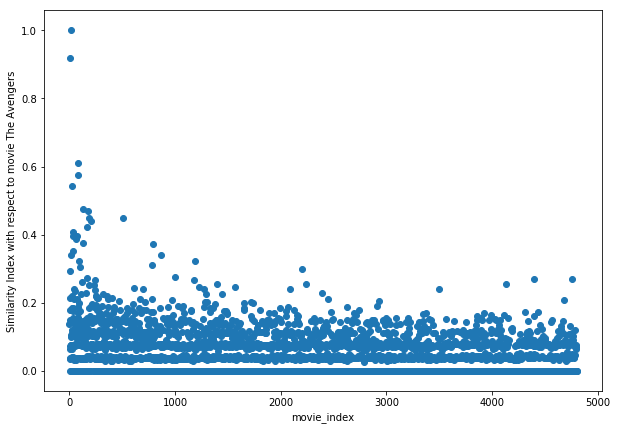

In [14]:
#Plotting of Similarity Index of every movie with respect to movie The Avengers inclusing itself 
plt.figure(figsize=(10, 7))
plt.scatter(df["index"], cosine_sim[movie_index])

plt.xlabel('movie_index')
plt.ylabel("Similarity Index with respect to movie The Avengers")
plt.show()

In [15]:
#Query2: Which are the top 5 movies profitable movies. What are the profit, revenue, budget and director name for such movies?
#The profit is decided by revenue and budget. Hence, the same features are considered under name finance.
finance = ['budget','revenue']

In [16]:
#Profit is calculated and a new column named profit is created
def profit(row):
    return row['revenue']-row['budget']

In [17]:
#filling all NaNs with blank string
for finance in finance:
    df[finance] = df[finance].fillna('') 

#applying profit() method over each rows of dataframe and storing the profit values in "profit" column
df["profit"] = df.apply(profit,axis=1)

In [18]:
#Displaying the first row of the profit column
df.iloc[0].profit

2550965087

In [19]:
#Obtaining revenue, budget and director name from the movie index
def index_revenue(index):
    return df[df.index == index]["revenue"].values[0]
def index_budget(index):
    return df[df.index == index]["budget"].values[0]
def index_director(index):
    return df[df.index == index]["director"].values[0]

In [20]:
#accessing the row corresponding to given movie to find the profit for that movie and then enumerating over it
prof = list(enumerate(df['profit']))
prof

[(0, 2550965087),
 (1, 661000000),
 (2, 635674609),
 (3, 834939099),
 (4, 24139100),
 (5, 632871626),
 (6, 331794936),
 (7, 1125403694),
 (8, 683959197),
 (9, 623260194),
 (10, 121081192),
 (11, 386090727),
 (12, 865659812),
 (13, -165710090),
 (14, 437845518),
 (15, 194651413),
 (16, 1299557910),
 (17, 665713802),
 (18, 399026776),
 (19, 706019788),
 (20, 537215857),
 (21, 110669540),
 (22, 708400000),
 (23, 192234864),
 (24, 343000000),
 (25, 1645034188),
 (26, 903304495),
 (27, 94025485),
 (28, 1363528810),
 (29, 908561013),
 (30, 583766341),
 (31, 1015439994),
 (32, 825491110),
 (33, 249359555),
 (34, 543559607),
 (35, 686297228),
 (36, 881405097),
 (37, 291868548),
 (38, 505717432),
 (39, 230062763),
 (40, 359852396),
 (41, 19851172),
 (42, 866969703),
 (43, 171353001),
 (44, 1316249360),
 (45, 331865000),
 (46, 497862775),
 (47, 277365246),
 (48, 2687603),
 (49, 246040419),
 (50, 185154643),
 (51, 227602906),
 (52, 928746996),
 (53, 601636033),
 (54, 156926147),
 (55, 353983207),

In [21]:
#Sorting the profits in descending order
s_prof = sorted(prof,key=lambda x:x[1],reverse=True)[0:]
s_prof

[(0, 2550965087),
 (25, 1645034188),
 (28, 1363528810),
 (44, 1316249360),
 (16, 1299557910),
 (7, 1125403694),
 (124, 1124219009),
 (546, 1082730962),
 (329, 1024888979),
 (31, 1015439994),
 (52, 928746996),
 (29, 908561013),
 (26, 903304495),
 (506, 894761885),
 (36, 881405097),
 (42, 866969703),
 (12, 865659812),
 (675, 857100000),
 (197, 851475550),
 (330, 847287400),
 (328, 846335536),
 (3, 834939099),
 (32, 825491110),
 (65, 819558444),
 (233, 809317558),
 (504, 800958308),
 (348, 796686817),
 (78, 791550600),
 (113, 788212738),
 (2967, 782410554),
 (325, 782244782),
 (262, 778368364),
 (276, 776688482),
 (98, 771103568),
 (565, 769838758),
 (2912, 764398007),
 (114, 745921036),
 (494, 743241776),
 (507, 741969268),
 (229, 737000000),
 (788, 725112979),
 (183, 717423452),
 (172, 709000000),
 (22, 708400000),
 (19, 706019788),
 (35, 686297228),
 (8, 683959197),
 (159, 682708551),
 (77, 682611174),
 (17, 665713802),
 (96, 665532764),
 (1, 661000000),
 (898, 659827462),
 (191, 65980

In [22]:
#Displaying the results.
i=0
print("Top 5 profit making movies are (The financial values are in US Dollars)")
for element in s_prof:
    print(index_title(element[0]),"--(Movie Index-",element[0], ",Profit-", element[1],
          ",Budget-",index_budget(element[0]),",Revenue-",index_revenue(element[0]),
          ",Director-",index_director(element[0]),")")
    i=i+1
    if i>5:
        break

Top 5 profit making movies are (The financial values are in US Dollars)
Avatar --(Movie Index- 0 ,Profit- 2550965087 ,Budget- 237000000 ,Revenue- 2787965087 ,Director- James Cameron )
Titanic --(Movie Index- 25 ,Profit- 1645034188 ,Budget- 200000000 ,Revenue- 1845034188 ,Director- James Cameron )
Jurassic World --(Movie Index- 28 ,Profit- 1363528810 ,Budget- 150000000 ,Revenue- 1513528810 ,Director- Colin Trevorrow )
Furious 7 --(Movie Index- 44 ,Profit- 1316249360 ,Budget- 190000000 ,Revenue- 1506249360 ,Director- James Wan )
The Avengers --(Movie Index- 16 ,Profit- 1299557910 ,Budget- 220000000 ,Revenue- 1519557910 ,Director- Joss Whedon )
Avengers: Age of Ultron --(Movie Index- 7 ,Profit- 1125403694 ,Budget- 280000000 ,Revenue- 1405403694 ,Director- Joss Whedon )


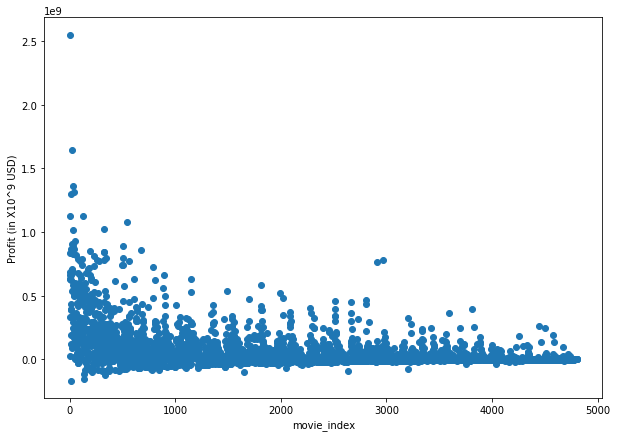

In [23]:
#Comparison of Profits of all the movies with the help of Plot between Profit and the movie Index
plt.figure(figsize=(10, 7))
plt.scatter(df['index'], df['profit'])
plt.xlabel('movie_index')
plt.ylabel('Profit (in X10^9 USD)')
plt.show()

In [24]:
#Query 3: Displaying the top 5 movies having the highest rating and the rating values
#accessing the values in vote_average column to corresponding to each row.
vote_avg = list(enumerate(df['vote_average']))
vote_avg

[(0, 7.2),
 (1, 6.9),
 (2, 6.3),
 (3, 7.6),
 (4, 6.1),
 (5, 5.9),
 (6, 7.4),
 (7, 7.3),
 (8, 7.4),
 (9, 5.7),
 (10, 5.4),
 (11, 6.1),
 (12, 7.0),
 (13, 5.9),
 (14, 6.5),
 (15, 6.3),
 (16, 7.4),
 (17, 6.4),
 (18, 6.2),
 (19, 7.1),
 (20, 6.5),
 (21, 6.2),
 (22, 7.6),
 (23, 5.8),
 (24, 6.6),
 (25, 7.5),
 (26, 7.1),
 (27, 5.5),
 (28, 6.5),
 (29, 6.9),
 (30, 6.7),
 (31, 6.8),
 (32, 6.4),
 (33, 6.3),
 (34, 7.0),
 (35, 6.0),
 (36, 5.8),
 (37, 5.7),
 (38, 6.5),
 (39, 6.3),
 (40, 5.8),
 (41, 5.1),
 (42, 7.6),
 (43, 5.9),
 (44, 7.3),
 (45, 6.7),
 (46, 7.5),
 (47, 7.4),
 (48, 5.5),
 (49, 7.3),
 (50, 6.2),
 (51, 6.7),
 (52, 6.1),
 (53, 5.7),
 (54, 6.6),
 (55, 6.7),
 (56, 6.6),
 (57, 7.8),
 (58, 6.1),
 (59, 5.6),
 (60, 6.6),
 (61, 5.2),
 (62, 5.5),
 (63, 6.7),
 (64, 6.4),
 (65, 8.2),
 (66, 7.7),
 (67, 6.0),
 (68, 7.4),
 (69, 7.0),
 (70, 5.1),
 (71, 5.2),
 (72, 5.9),
 (73, 5.3),
 (74, 7.6),
 (75, 5.9),
 (76, 5.6),
 (77, 8.0),
 (78, 6.7),
 (79, 6.6),
 (80, 5.8),
 (81, 7.0),
 (82, 7.3),
 (83, 4.8),
 (

In [25]:
#Sorting the rating in descending order
sorted_vote_avg = sorted(vote_avg,key=lambda x:x[1],reverse=True)[0:]
sorted_vote_avg

[(3519, 10.0),
 (4045, 10.0),
 (4247, 10.0),
 (4662, 10.0),
 (3992, 9.5),
 (2386, 9.3),
 (1881, 8.5),
 (2970, 8.5),
 (2796, 8.4),
 (3337, 8.4),
 (662, 8.3),
 (1818, 8.3),
 (2294, 8.3),
 (2731, 8.3),
 (3232, 8.3),
 (3865, 8.3),
 (4755, 8.3),
 (65, 8.2),
 (690, 8.2),
 (809, 8.2),
 (1663, 8.2),
 (1847, 8.2),
 (1987, 8.2),
 (1990, 8.2),
 (2170, 8.2),
 (2247, 8.2),
 (2947, 8.2),
 (3057, 8.2),
 (3719, 8.2),
 (3723, 8.2),
 (4535, 8.2),
 (4602, 8.2),
 (95, 8.1),
 (96, 8.1),
 (329, 8.1),
 (1553, 8.1),
 (2091, 8.1),
 (2284, 8.1),
 (2453, 8.1),
 (2760, 8.1),
 (2912, 8.1),
 (3041, 8.1),
 (3454, 8.1),
 (3573, 8.1),
 (3622, 8.1),
 (3788, 8.1),
 (3866, 8.1),
 (3906, 8.1),
 (4238, 8.1),
 (4302, 8.1),
 (77, 8.0),
 (262, 8.0),
 (330, 8.0),
 (463, 8.0),
 (494, 8.0),
 (1196, 8.0),
 (1405, 8.0),
 (1525, 8.0),
 (1532, 8.0),
 (1850, 8.0),
 (2285, 8.0),
 (2522, 8.0),
 (2638, 8.0),
 (3036, 8.0),
 (3208, 8.0),
 (3432, 8.0),
 (3471, 8.0),
 (3503, 8.0),
 (3776, 8.0),
 (3875, 8.0),
 (3886, 8.0),
 (3940, 8.0),
 (39

In [26]:
#Displaying the top 5 movies having the highest rating
i=0
print("Top 5 movies having the highest ratings are:-")
for element in sorted_vote_avg:
    print(index_title(element[0]), "Vote_average-", element[1])
    i=i+1
    if i>5:
        break

Top 5 movies having the highest ratings are:-
Stiff Upper Lips Vote_average- 10.0
Dancer, Texas Pop. 81 Vote_average- 10.0
Me You and Five Bucks Vote_average- 10.0
Little Big Top Vote_average- 10.0
Sardaarji Vote_average- 9.5
One Man's Hero Vote_average- 9.3


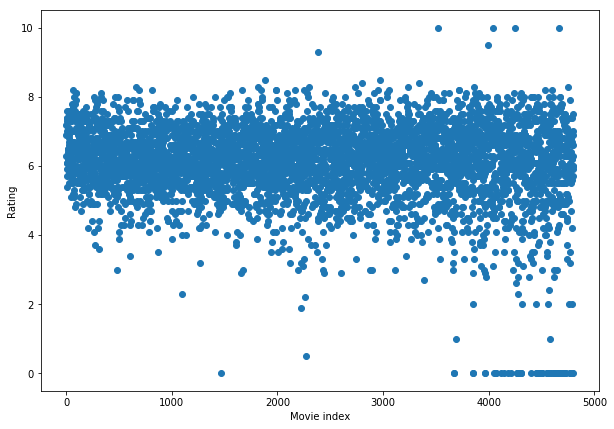

In [27]:
#Comparison of ratings value of various movies obtained by Average Vote Count using Plot between Rating and Movie Index
plt.figure(figsize=(10, 7))
plt.scatter(df['index'], df['vote_average'])
plt.xlabel('Movie index')
plt.ylabel('Rating')
plt.show()

In [28]:
#Query 4: Displaying the top 5 movies having the highest popularity.
#accessing the values in popularity column corresponding to each row.
pop = list(enumerate(df['popularity']))
pop

[(0, 150.437577),
 (1, 139.082615),
 (2, 107.376788),
 (3, 112.31295),
 (4, 43.926995),
 (5, 115.699814),
 (6, 48.681969),
 (7, 134.27922900000002),
 (8, 98.885637),
 (9, 155.790452),
 (10, 57.925623),
 (11, 107.928811),
 (12, 145.84737900000005),
 (13, 49.046956),
 (14, 99.398009),
 (15, 53.978602),
 (16, 144.448633),
 (17, 135.413856),
 (18, 52.035179),
 (19, 120.965743),
 (20, 89.866276),
 (21, 37.668301),
 (22, 94.370564),
 (23, 42.990906),
 (24, 61.22601),
 (25, 100.025899),
 (26, 198.372395),
 (27, 64.928382),
 (28, 418.708552),
 (29, 93.004993),
 (30, 35.149586),
 (31, 77.68208),
 (32, 78.530105),
 (33, 3.857526),
 (34, 89.186492),
 (35, 21.939663),
 (36, 116.840296),
 (37, 46.985445),
 (38, 89.270217),
 (39, 73.79505),
 (40, 49.98659),
 (41, 51.872839),
 (42, 59.99541800000001),
 (43, 71.862892),
 (44, 102.322217),
 (45, 81.834855),
 (46, 118.078691),
 (47, 78.29101800000002),
 (48, 43.349855),
 (49, 61.196071),
 (50, 62.169881),
 (51, 56.523205),
 (52, 28.529607),
 (53, 75.674

In [29]:
#Sorting the popularity in descending order
sorted_pop = sorted(pop,key=lambda x:x[1],reverse=True)[1:]
sorted_pop

[(95, 724.247784),
 (788, 514.5699559999998),
 (94, 481.098624),
 (127, 434.278564),
 (28, 418.708552),
 (199, 271.972889),
 (82, 243.79174300000003),
 (200, 206.227151),
 (88, 203.73459),
 (108, 202.042635),
 (26, 198.372395),
 (3865, 192.528841),
 (65, 187.322927),
 (270, 167.93287),
 (96, 167.58371),
 (124, 165.125366),
 (9, 155.790452),
 (0, 150.437577),
 (662, 146.75739099999996),
 (12, 145.84737900000005),
 (2522, 145.364591),
 (16, 144.448633),
 (3337, 143.659698),
 (238, 143.350376),
 (693, 143.041543),
 (362, 140.849495),
 (456, 139.575085),
 (64, 139.272042),
 (1, 139.082615),
 (335, 138.433168),
 (809, 138.133331),
 (262, 138.049577),
 (506, 136.886704),
 (1881, 136.747729),
 (17, 135.413856),
 (7, 134.27922900000002),
 (276, 132.397737),
 (1465, 131.815575),
 (87, 130.311355),
 (77, 128.65596399999998),
 (3719, 127.525581),
 (102, 127.284427),
 (1337, 127.084938),
 (2912, 126.393695),
 (55, 125.114374),
 (329, 123.630332),
 (3232, 121.463076),
 (19, 120.965743),
 (68, 120.7

In [30]:
#Displaying the top 5 movies having highest popularity
i=0
print("Top 5 Popular movie and their popularity are\n ")
for element in sorted_pop:
    print(index_title(element[0]))
    i=i+1
    if i>5:
        break

Top 5 Popular movie and their popularity are
 
Interstellar
Deadpool
Guardians of the Galaxy
Mad Max: Fury Road
Jurassic World
Pirates of the Caribbean: The Curse of the Black Pearl


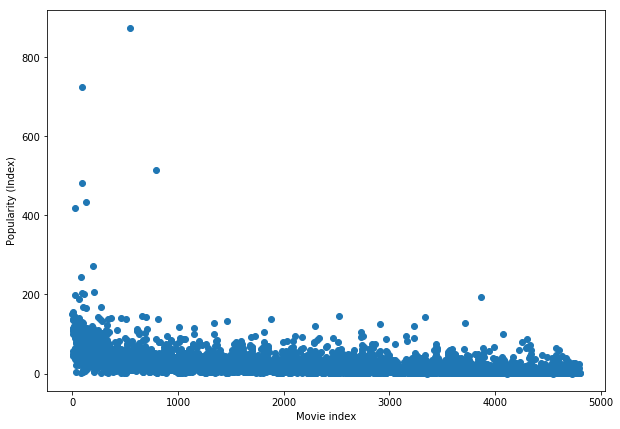

In [31]:
#Comparison of Popularities of various movies using Plot between Popularity values and Movie Index.
plt.figure(figsize=(10, 7))
plt.scatter(df['index'], df['popularity'])
plt.xlabel('Movie index')
plt.ylabel('Popularity (Index)')
plt.show()